In [48]:
import pandas as pd

df = pd.read_csv('DATA/RU_Electricity_Market_PZ_dayahead_price_volume.csv')
df.head(1)

,timestep,consumption_eur,consumption_sib,price_eur,price_sib
0,2006-09-01 00:00,62341.0,17916.0,275.22,0.0


In [49]:
df.drop(['consumption_eur', 'price_eur'], axis=1, inplace=True)

In [50]:
df.head(1)

,timestep,consumption_sib,price_sib
0,2006-09-01 00:00,17916.0,0.0


In [51]:
dfClim = pd.read_csv('DATA/climCombined_RUS.csv')
dfClim.head(1)

,DATE,T_MAX_RUS,T_MIN_RUS,T_AVG_RUS,RH_RUS,WND_RUS,PRCP_RUS,ONI
0,2006-09-01,21.233333,9.333333,14.633333,76.033333,9.633333,1.666667,0.54


In [52]:
# Convert 'timestep' to datetime
dfDaily = df.copy()
dfDaily['timestep'] = pd.to_datetime(dfDaily['timestep'])

# Set 'timestep' as the index
dfDaily.set_index('timestep', inplace=True)

# Resample to dailyintervals and calculate the mean for each interval
# '12H' - 12 hours, 'D' - daily
dfDaily = dfDaily.resample('D').mean()

# Reset the index to make 'timestep' a column again
dfDaily.reset_index(inplace=True)

dfDaily.head(5)

,timestep,consumption_sib,price_sib
0,2006-09-01,18659.541667,0.000000
1,2006-09-02,18176.500000,0.000000
2,2006-09-03,18105.208333,22.421667
3,2006-09-04,18760.708333,0.786667
4,2006-09-05,18867.916667,34.899167


In [53]:
dfDaily.shape

(1909, 3)

In [54]:
df_info = pd.DataFrame(df.dtypes, columns=['Dtype'])
df_info['Unique'] = df.nunique().values
df_info['Null'] = df.isnull().sum().values
df_info

,Dtype,Unique,Null
timestep,object,45816,0
consumption_sib,float64,24406,0
price_sib,float64,26597,0


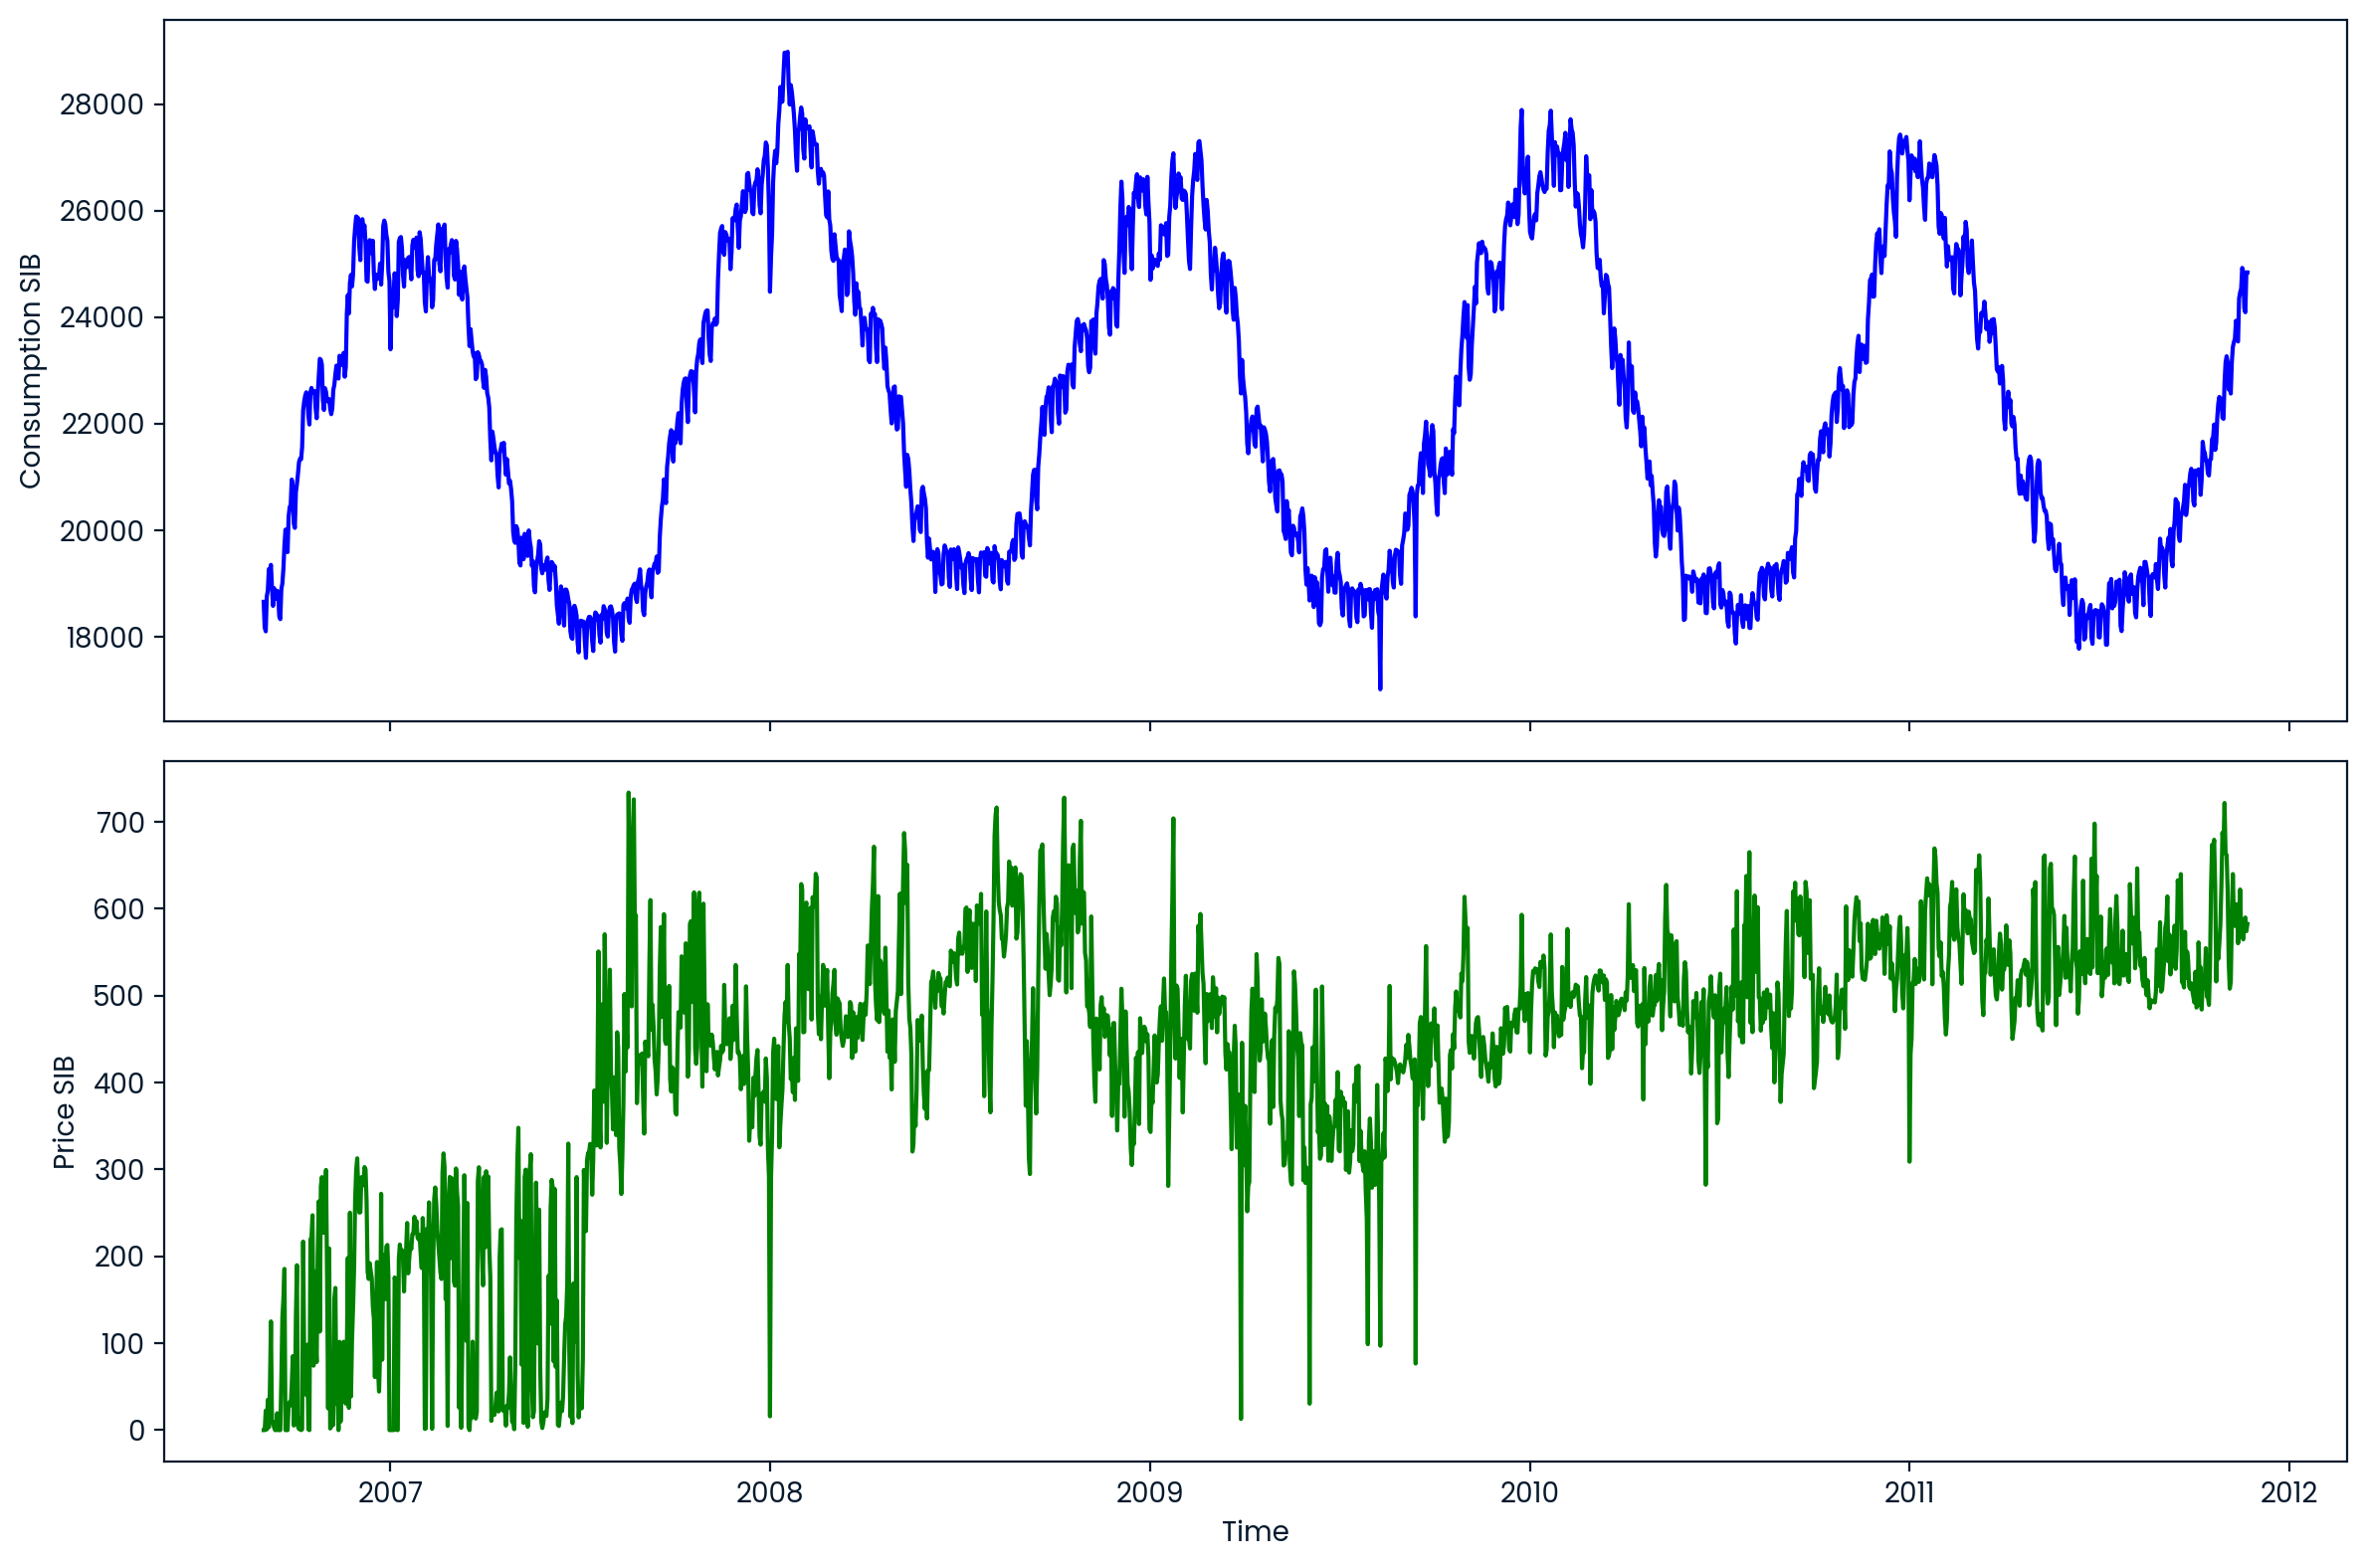

In [55]:
import matplotlib.pyplot as plt

# Create a figure and two subplots (2 rows, 1 column)
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# First subplot: plot consumption_sib against timestep
axs[0].plot(dfDaily['timestep'], dfDaily['consumption_sib'], label='Consumption SIB', color='blue')
# axs[0].set_title('Consumption SIB over Time')
# axs[0].set_xlabel('Time')
axs[0].set_ylabel('Consumption SIB')
# axs[0].grid(True)
axs[0].tick_params(axis='x', labelbottom=False)

# Second subplot: plot price_sib against timestep
axs[1].plot(dfDaily['timestep'], dfDaily['price_sib'], label='Price SIB', color='green')
# axs[1].set_title('Price SIB over Time')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Price SIB')
# axs[1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# # Display the plots
# plt.show()

In [57]:
dfClim_info = pd.DataFrame(dfClim.dtypes, columns=['Dtype'])
dfClim_info['Unique'] = dfClim.nunique().values
dfClim_info['Null'] = dfClim.isnull().sum().values
dfClim_info

,Dtype,Unique,Null
DATE,object,1917,0
T_MAX_RUS,float64,1148,2
T_MIN_RUS,float64,1151,2
T_AVG_RUS,float64,1125,2
RH_RUS,float64,955,2
WND_RUS,float64,332,2
PRCP_RUS,float64,219,2
ONI,float64,56,0


In [58]:
from sklearn.impute import SimpleImputer

# Drop the DATE column
dfClim_no_date = dfClim.drop(columns=['DATE'])

# Create an imputer object with the mean strategy
imputer = SimpleImputer(strategy='mean')

# Impute the missing values in dfClim_no_date
dfClim_imputed = pd.DataFrame(imputer.fit_transform(dfClim_no_date), columns=dfClim_no_date.columns)

# Add the DATE column back to the imputed dataframe
dfClim_imputed['DATE'] = dfClim['DATE'].values

dfClim_imputed = dfClim_imputed[dfClim.columns]
dfClim_imputed.head(2)

,DATE,T_MAX_RUS,T_MIN_RUS,T_AVG_RUS,RH_RUS,WND_RUS,PRCP_RUS,ONI
0,2006-09-01,21.233333,9.333333,14.633333,76.033333,9.633333,1.666667,0.54
1,2006-09-02,17.866667,7.300000,13.133333,73.400000,11.733333,4.000000,0.54


In [59]:
dfClim_imputed_info = pd.DataFrame(dfClim_imputed.dtypes, columns=['Dtype'])
dfClim_imputed_info['Unique'] = dfClim_imputed.nunique().values
dfClim_imputed_info['Null'] = dfClim_imputed.isnull().sum().values
dfClim_imputed_info

,Dtype,Unique,Null
DATE,object,1917,0
T_MAX_RUS,float64,1149,0
T_MIN_RUS,float64,1152,0
T_AVG_RUS,float64,1126,0
RH_RUS,float64,956,0
WND_RUS,float64,333,0
PRCP_RUS,float64,220,0
ONI,float64,56,0


In [60]:
# dfClim_imputed.to_csv('DATA/climCombined_RUS_imputed.csv', header=True, index=False)

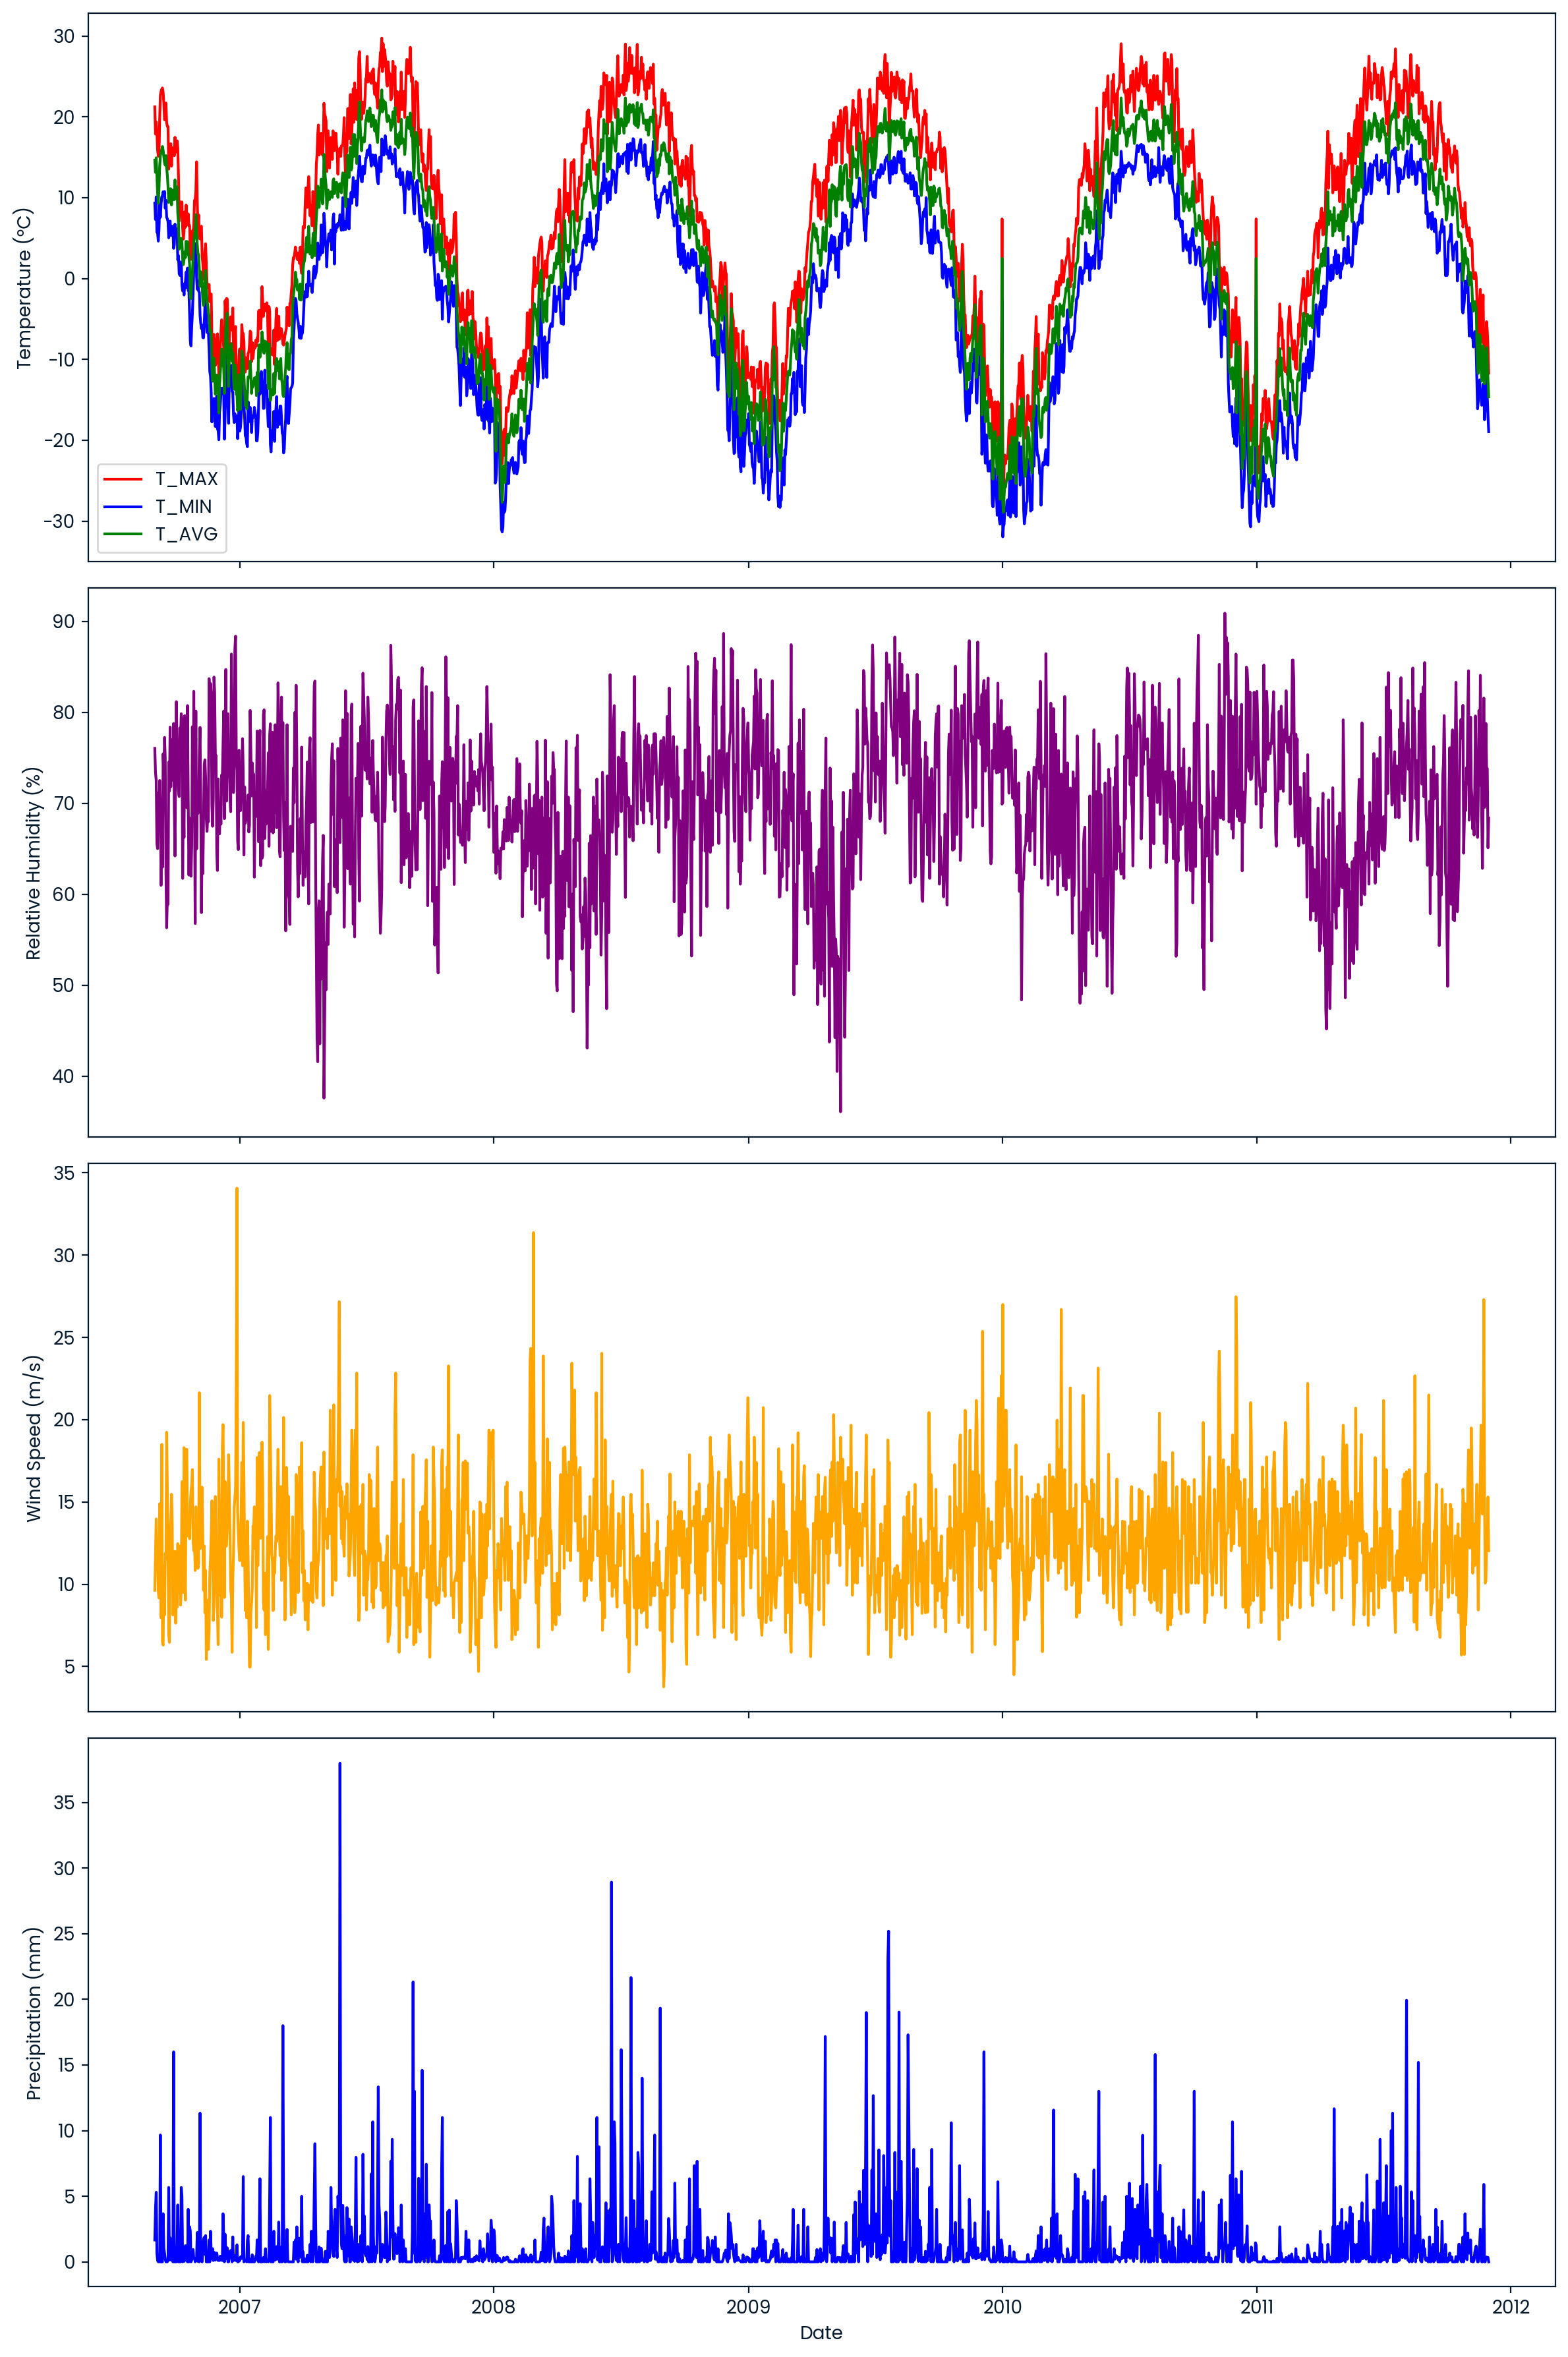

In [61]:
import matplotlib.pyplot as plt

# Convert DATE column to datetime
dfClim_imputed['DATE'] = pd.to_datetime(dfClim_imputed['DATE'])

# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(12, 18), sharex=True)

# First subplot: T_MAX, T_MIN, T_AVG vs time
axs[0].plot(dfClim_imputed['DATE'], dfClim_imputed['T_MAX_RUS'], label='T_MAX', color='r')
axs[0].plot(dfClim_imputed['DATE'], dfClim_imputed['T_MIN_RUS'], label='T_MIN', color='b')
axs[0].plot(dfClim_imputed['DATE'], dfClim_imputed['T_AVG_RUS'], label='T_AVG', color='g')
axs[0].set_ylabel('Temperature (°C)')
axs[0].legend()
# axs[0].set_title('Temperature vs Time')

# Second subplot: RH vs time
axs[1].plot(dfClim_imputed['DATE'], dfClim_imputed['RH_RUS'], label='RH_RUS', color='purple')
axs[1].set_ylabel('Relative Humidity (%)')
# axs[1].legend()
# axs[1].set_title('Relative Humidity vs Time')

# Third subplot: WND vs time
axs[2].plot(dfClim_imputed['DATE'], dfClim_imputed['WND_RUS'], label='WND_RUS', color='orange')
axs[2].set_ylabel('Wind Speed (m/s)')
# axs[2].legend()
# axs[2].set_title('Wind Speed vs Time')

# Fourth subplot: PRCP vs time
axs[3].plot(dfClim_imputed['DATE'], dfClim_imputed['PRCP_RUS'], label='PRCP_RUS', color='blue')
axs[3].set_ylabel('Precipitation (mm)')
# axs[3].legend()
# axs[3].set_title('Precipitation vs Time')

# Set x-axis label for the last subplot
axs[3].set_xlabel('Date')

# Adjust layout
plt.tight_layout()
# plt.show()

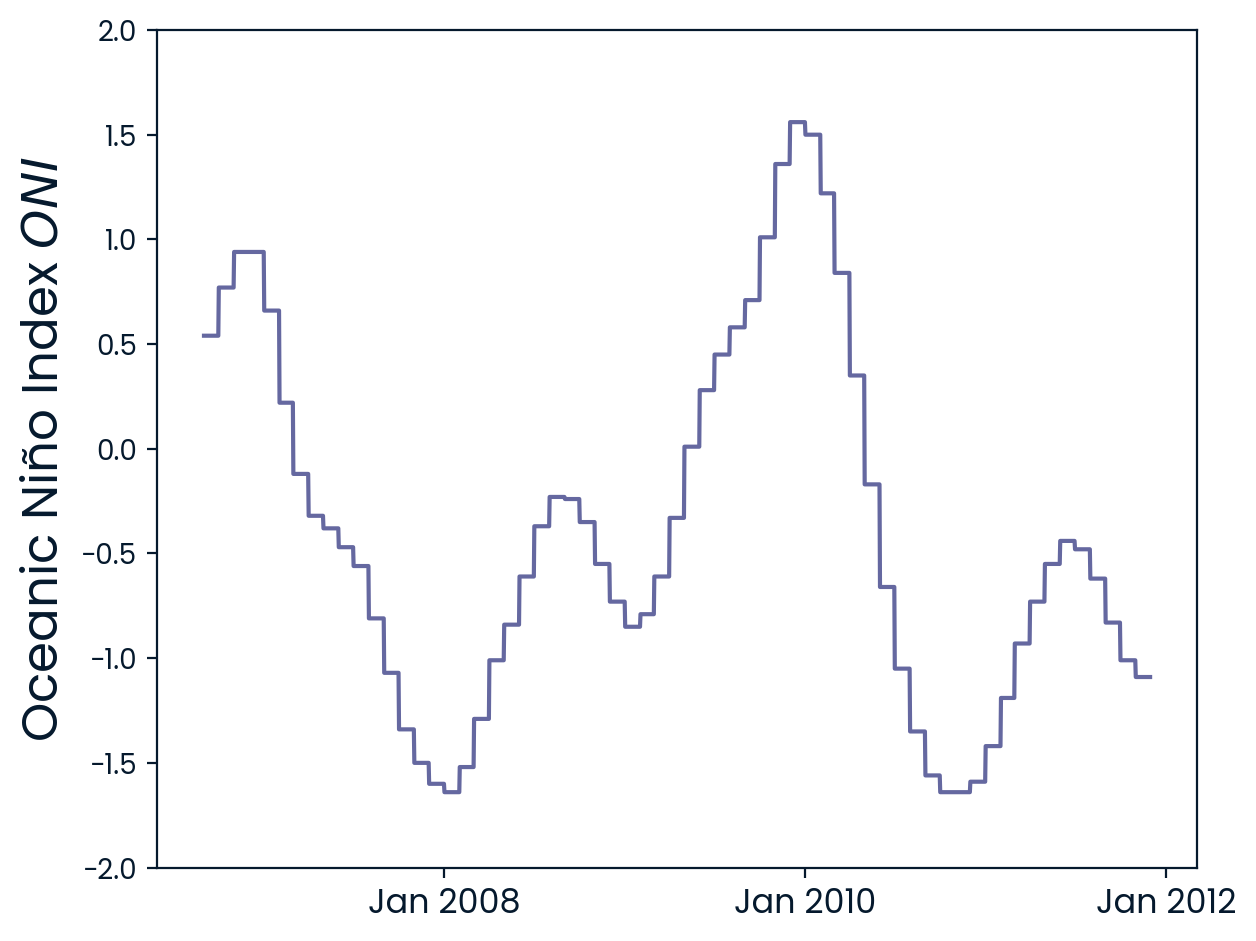

In [62]:
import matplotlib.dates as mdates
nTicks=5
fig, ax = plt.subplots()
ax.plot(dfClim_imputed['DATE'], dfClim_imputed['ONI'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Set x-axis labels to show month and year
ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=nTicks, maxticks=nTicks))
ax.set_yticks(ax.get_yticks()[::len(ax.get_yticks())//nTicks])  # Ensure nTicks yticks
ax.set_ylabel('Oceanic Niño Index $ONI$', size=18)
ax.tick_params(axis='x', labelsize=12)
plt.tight_layout()

In [63]:
dfMerged = pd.merge(dfDaily, dfClim_imputed, left_on='timestep', right_on='DATE')

# Drop the 'timestep' column
dfMerged.drop(columns=['timestep'], inplace=True)

# Reorder columns to make 'DATE' the first column
cols = ['DATE'] + [col for col in dfMerged.columns if col != 'DATE']
dfMerged = dfMerged[cols]

# Display the first few rows of the merged dataframe to verify the merge
dfMerged.head()

,DATE,consumption_sib,price_sib,T_MAX_RUS,T_MIN_RUS,T_AVG_RUS,RH_RUS,WND_RUS,PRCP_RUS,ONI
0,2006-09-01,18659.541667,0.000000,21.233333,9.333333,14.633333,76.033333,9.633333,1.666667,0.54
1,2006-09-02,18176.500000,0.000000,17.866667,7.300000,13.133333,73.400000,11.733333,4.000000,0.54
2,2006-09-03,18105.208333,22.421667,19.366667,10.100000,14.933333,72.500000,13.966667,5.300000,0.54
3,2006-09-04,18760.708333,0.786667,18.066667,5.733333,12.666667,65.566667,12.033333,0.666667,0.54
4,2006-09-05,18867.916667,34.899167,15.933333,5.666667,10.633333,65.000000,12.166667,0.100000,0.54


Text(182.5, 1.0, '182')

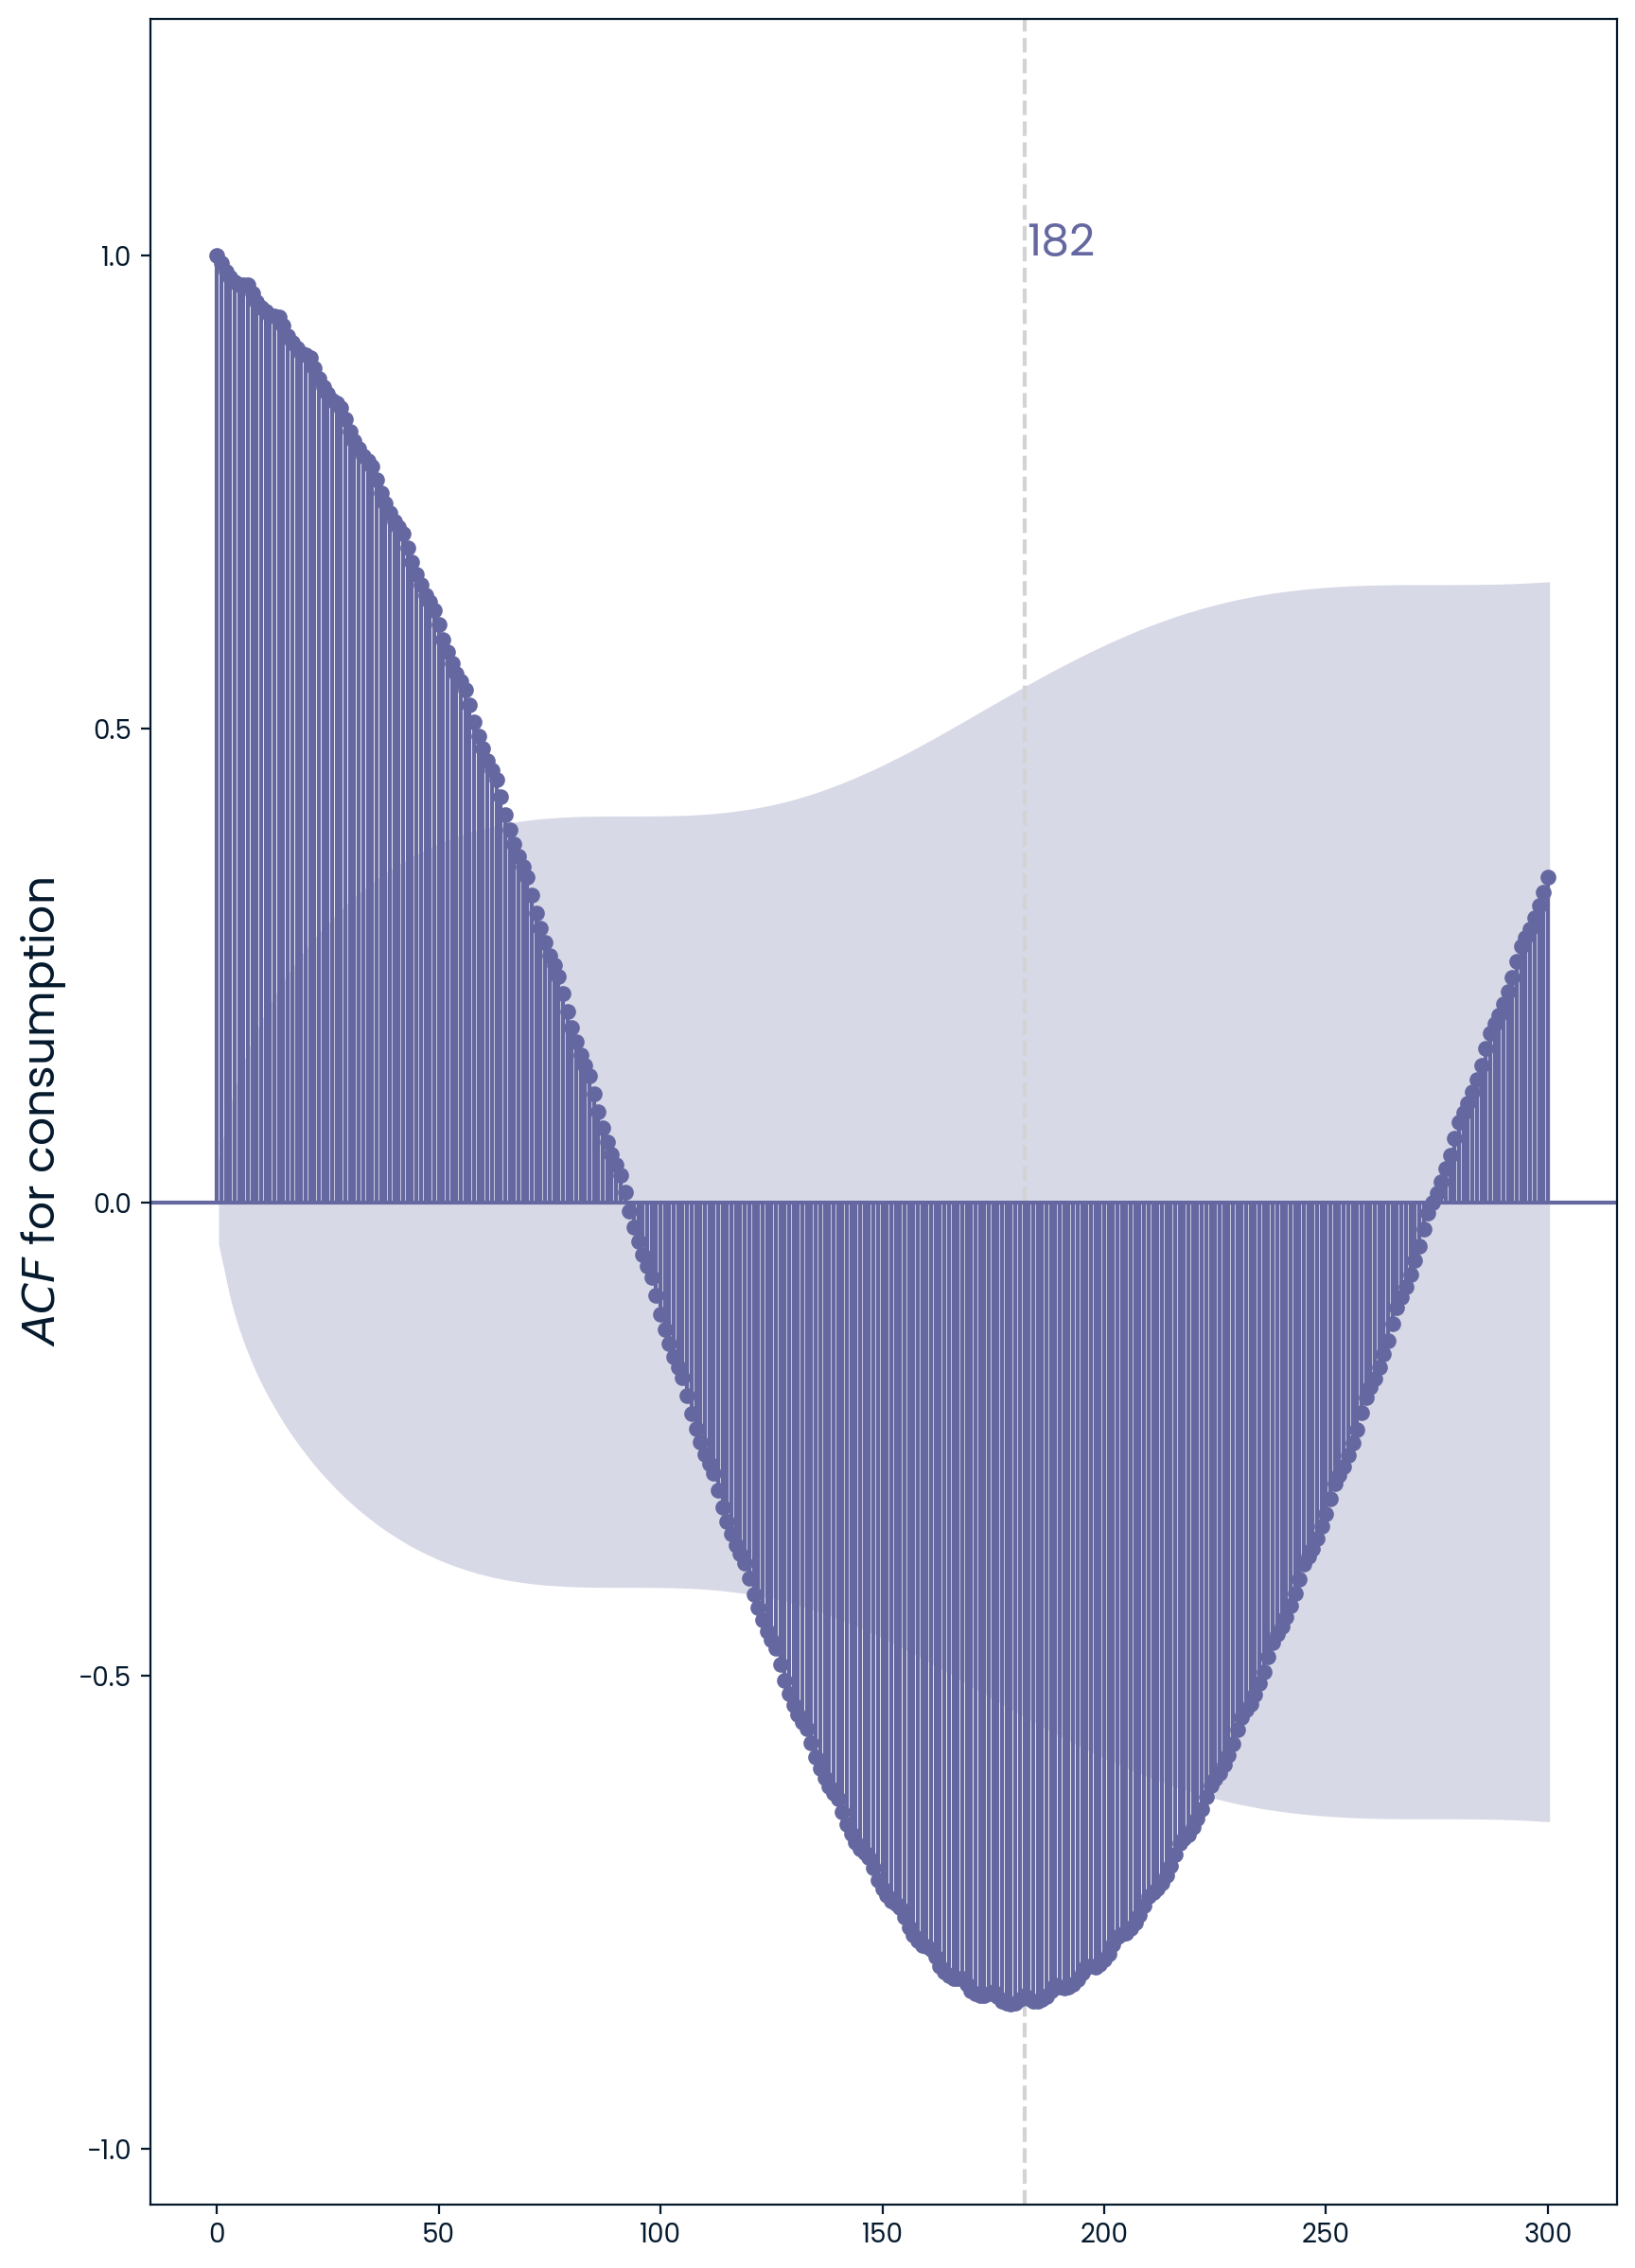

In [64]:
from statsmodels.graphics.tsaplots import plot_acf, plot_ccf

nlags = 300
nlags_inset = 365*24
fig, axes = plt.subplots(1, 1, figsize=(10, 15), sharex=True, gridspec_kw={'hspace': 0}) 

# ACF for LUZ
axes.axvline(182, color='lightgray', linestyle='--')
# axes.axvline(48, color='lightgray', linestyle='--')
plot_acf(dfMerged['consumption_sib'], lags=nlags, ax=axes, auto_ylims=True)
axes.set_ylabel('$ACF$ for consumption', size=17)
axes.set_title('')
axes.text(182+0.5, 0.8*axes.get_ylim()[1], '182', color='#6568a0',size=17)



In [65]:
dfDaily.columns

Index(['timestep', 'consumption_sib', 'price_sib'], dtype='object')

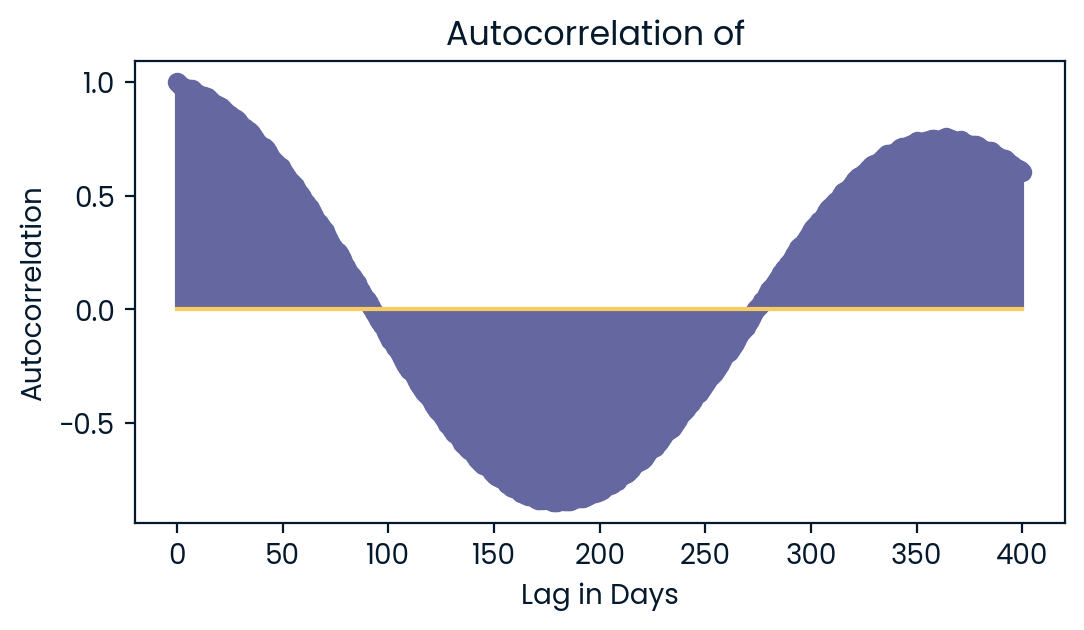

In [66]:
from statsmodels.tsa.stattools import acf, ccf
autocorr_elec = acf(dfMerged['consumption_sib'], nlags=400)

plt.figure(figsize=(6, 3))
plt.stem(range(len(autocorr_elec)), autocorr_elec)
plt.title('Autocorrelation of consumption_sib')
plt.xlabel('Lag in Days')
plt.ylabel('Autocorrelation')
plt.show()

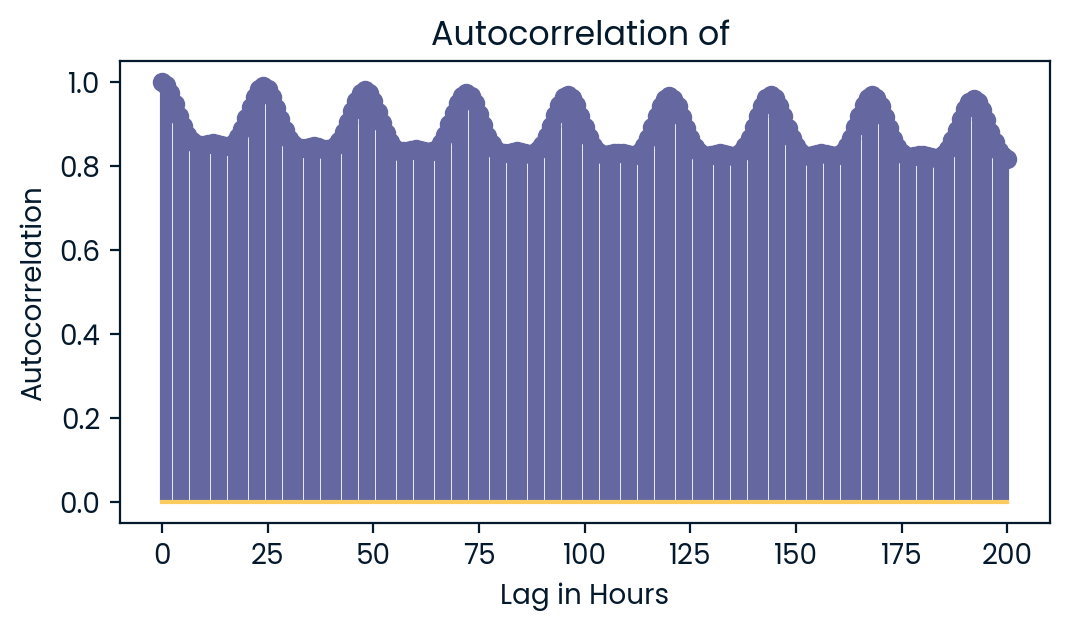

In [67]:
from statsmodels.tsa.stattools import acf, ccf
autocorr_elecH = acf(df['consumption_sib'], nlags=200)

plt.figure(figsize=(6, 3))
plt.stem(range(len(autocorr_elecH)), autocorr_elecH)
plt.title('Autocorrelation of consumption_sib')
plt.xlabel('Lag in Hours')
plt.ylabel('Autocorrelation')
plt.show()

In [68]:
from scipy.signal import find_peaks
peaks_,_ = find_peaks(autocorr_elec)
print(peaks_)

[  6 168 175 182 189 197 350 357 364 371 377]


In [69]:
dfClim_imputed.columns

Index(['DATE', 'T_MAX_RUS', 'T_MIN_RUS', 'T_AVG_RUS', 'RH_RUS', 'WND_RUS',
       'PRCP_RUS', 'ONI'],
      dtype='object')

In [78]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Prepare the data for Granger Causality Test
# Assuming 'dfClim_imputed' and 'dfDaily' are already aligned and have the same time index
data = pd.concat([dfMerged['PRCP_RUS'], dfMerged['consumption_sib']], axis=1)
# data.columns = ['rh', 'consumption']

# Drop rows with NaN or infinite values
data = data.dropna()

# Perform Granger Causality Test
max_lag = 20  # You can adjust the maximum number of lags
granger_test_result = grangercausalitytests(data, max_lag, verbose=True)

# Explanation:
# The Granger Causality Test checks if past values of 'climate' help in predicting 'consumption'.
# The null hypothesis is that 'climate' does not Granger-cause 'consumption'.
# If the p-values are below a certain threshold (e.g., 0.05), we reject the null hypothesis,
# indicating that 'climate' Granger-causes 'consumption'.


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=70.4399 , p=0.0000  , df_denom=1905, df_num=1
ssr based chi2 test:   chi2=70.5508 , p=0.0000  , df=1
likelihood ratio test: chi2=69.2778 , p=0.0000  , df=1
parameter F test:         F=70.4399 , p=0.0000  , df_denom=1905, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=34.4295 , p=0.0000  , df_denom=1902, df_num=2
ssr based chi2 test:   chi2=69.0400 , p=0.0000  , df=2
likelihood ratio test: chi2=67.8196 , p=0.0000  , df=2
parameter F test:         F=34.4295 , p=0.0000  , df_denom=1902, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=26.5154 , p=0.0000  , df_denom=1899, df_num=3
ssr based chi2 test:   chi2=79.8395 , p=0.0000  , df=3
likelihood ratio test: chi2=78.2126 , p=0.0000  , df=3
parameter F test:         F=26.5154 , p=0.0000  , df_denom=1899, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=19.2339 , p=0.

In [71]:
len(dfDaily)

1909

In [72]:
len(dfClim_imputed)

1917

<Figure size 640x480 with 0 Axes>

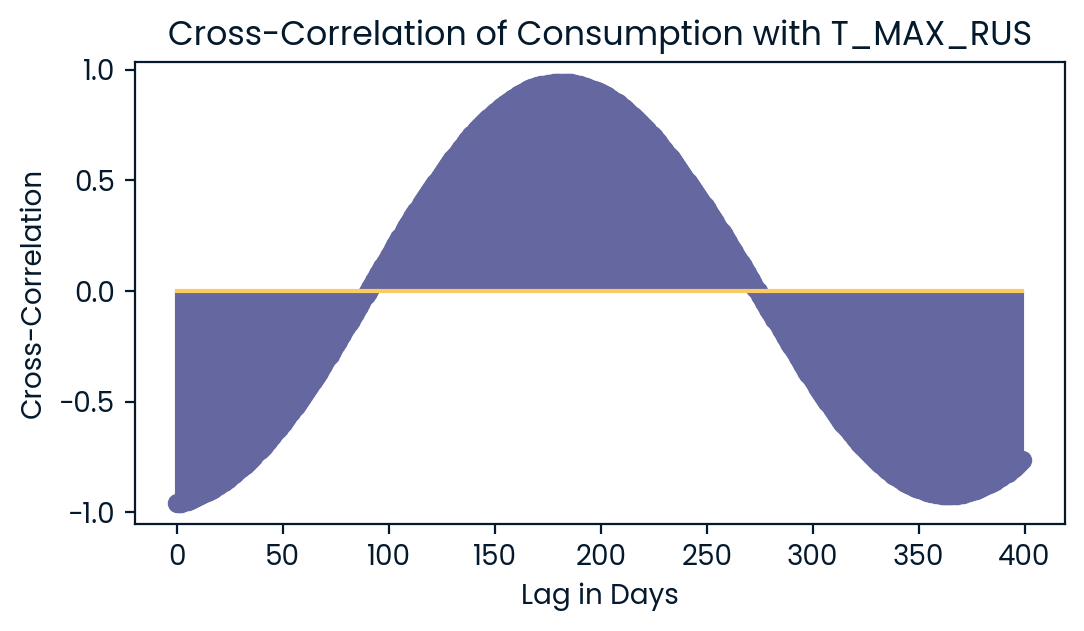

(array([183]), {})


<Figure size 640x480 with 0 Axes>

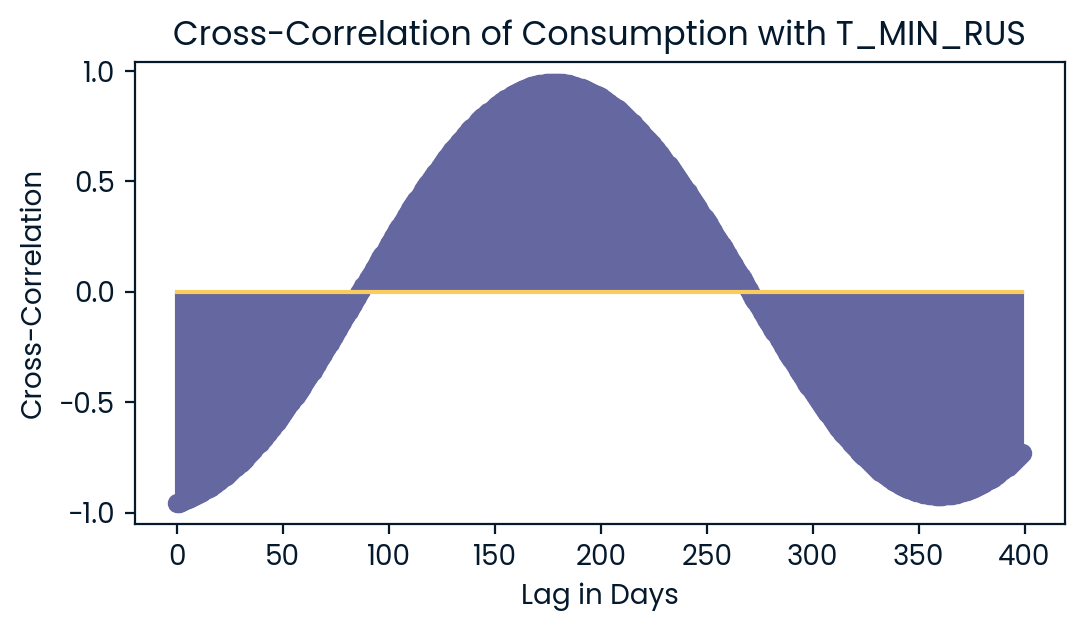

(array([175, 180]), {})


<Figure size 640x480 with 0 Axes>

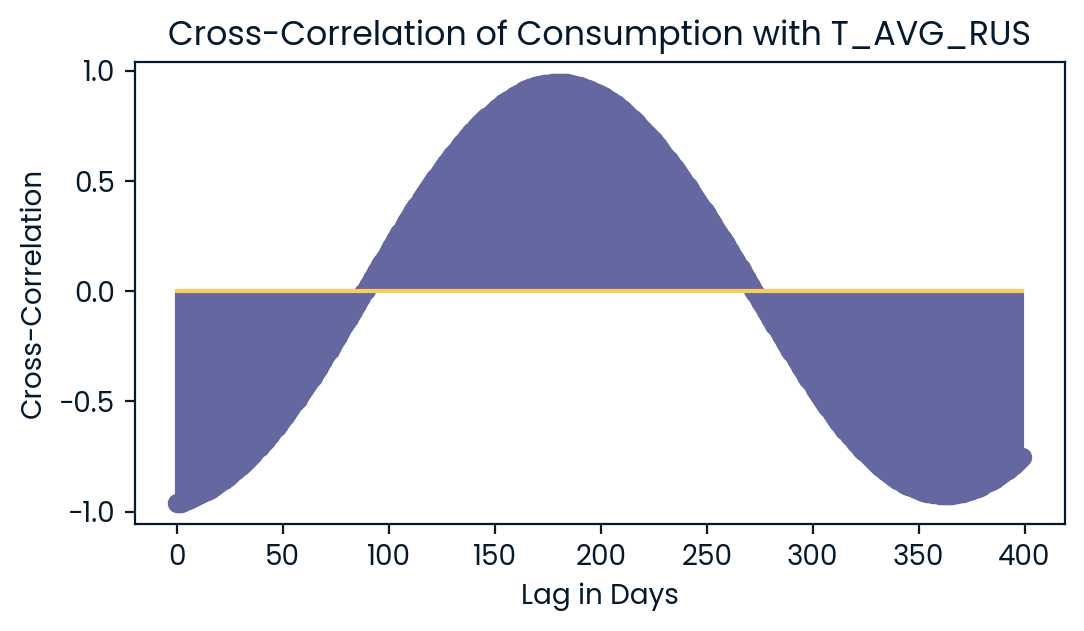

(array([180]), {})


<Figure size 640x480 with 0 Axes>

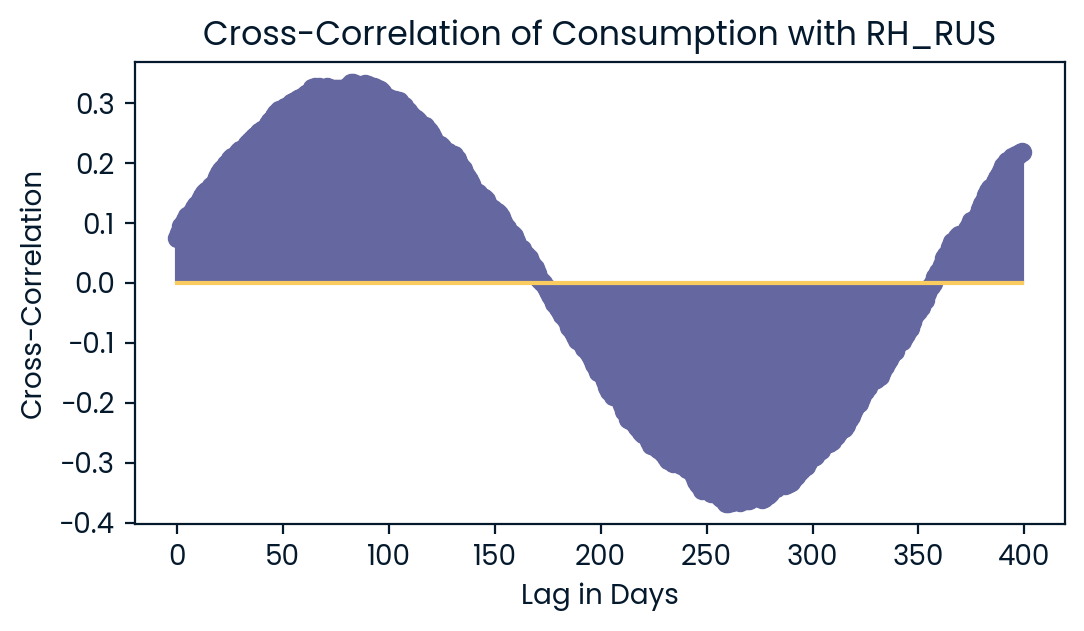

(array([ 16,  30,  48,  51,  58,  65,  67,  71,  76,  82,  86,  89,  93,
        95, 103, 131, 151, 226, 236, 250, 254, 261, 264, 268, 272, 274,
       282, 285, 296, 307, 313, 328, 341, 369, 394]), {})


<Figure size 640x480 with 0 Axes>

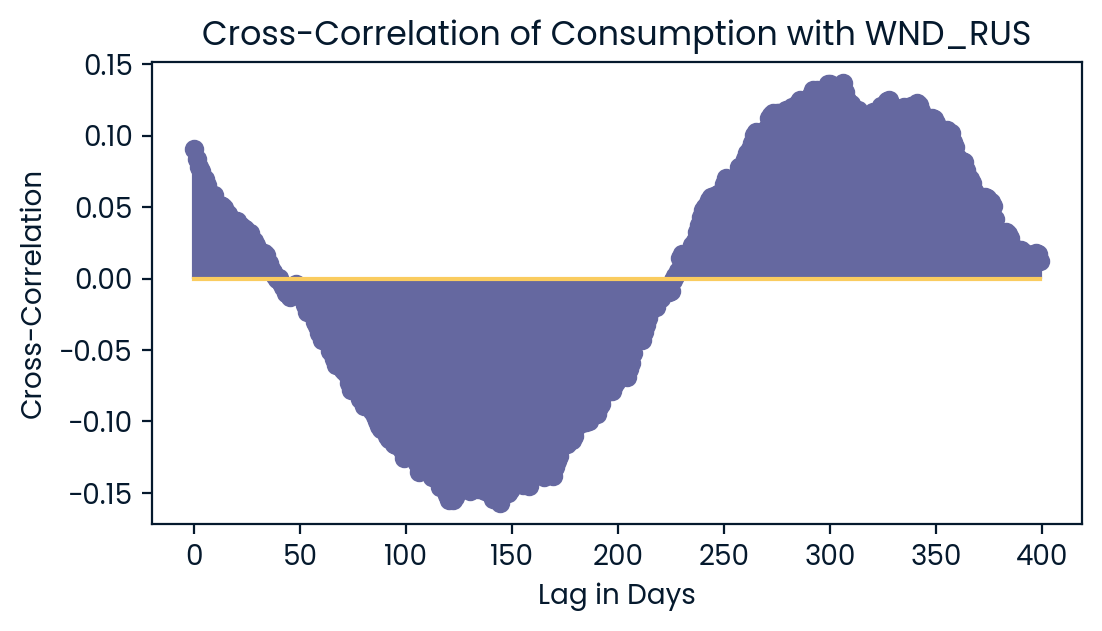

(array([  9,  12,  16,  19,  26,  33,  40,  48,  54,  62,  75,  79,  82,
        89,  97, 100, 103, 108, 110, 114, 117, 121, 125, 128, 131, 136,
       139, 142, 147, 152, 156, 161, 163, 167, 174, 182, 184, 188, 194,
       202, 209, 216, 223, 230, 245, 248, 251, 254, 265, 273, 276, 282,
       286, 292, 294, 299, 306, 310, 313, 317, 320, 328, 332, 335, 338,
       341, 346, 348, 355, 357, 362, 373, 376, 383, 390, 397]), {})


<Figure size 640x480 with 0 Axes>

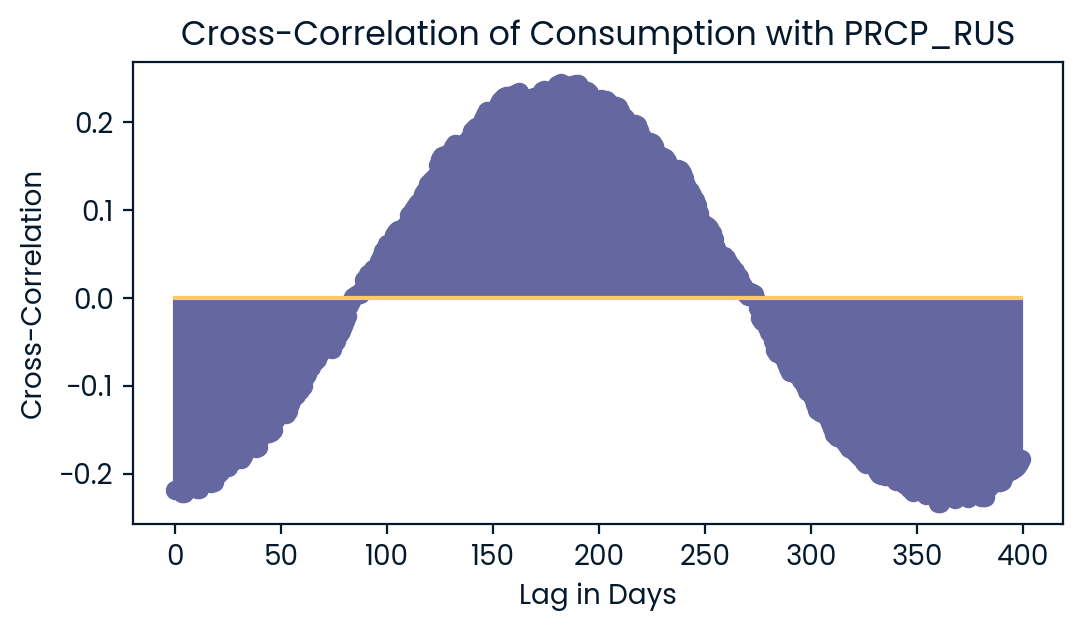

(array([  2,   7,  14,  19,  23,  30,  35,  43,  51,  56,  71,  93, 105,
       126, 128, 132, 135, 147, 156, 159, 162, 166, 170, 174, 177, 182,
       184, 187, 189, 194, 201, 208, 215, 222, 224, 229, 237, 250, 259,
       271, 278, 292, 306, 313, 320, 328, 334, 337, 341, 349, 351, 355,
       357, 363, 365, 371, 377, 387, 393]), {})


<Figure size 640x480 with 0 Axes>

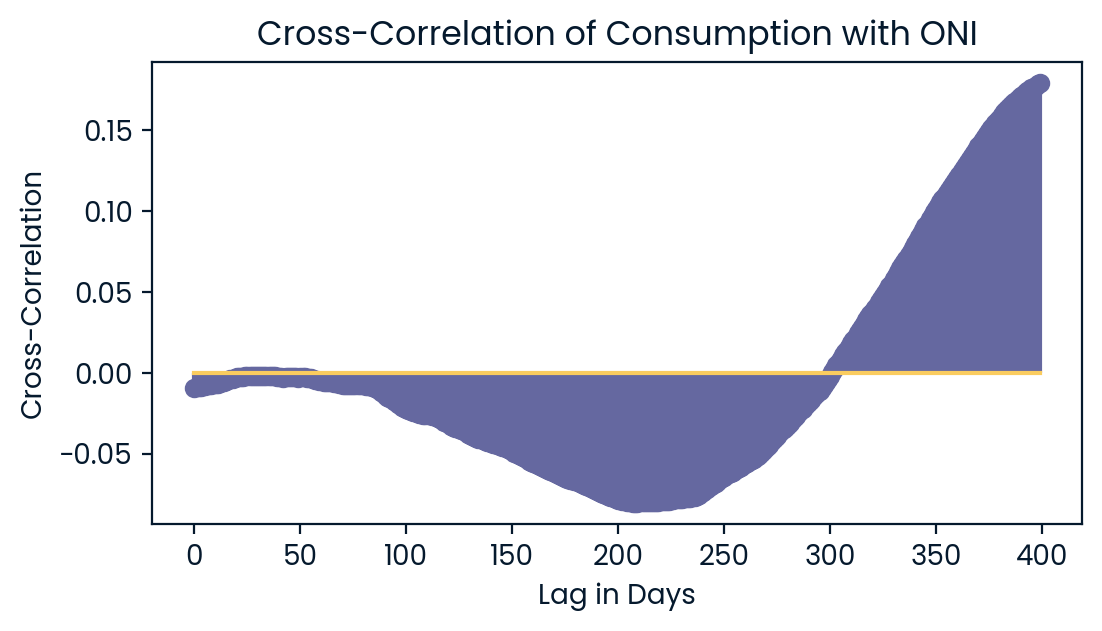

(array([ 26,  29,  31,  35,  37,  45,  47,  51,  76,  79, 212, 220, 227]), {})


<Figure size 640x480 with 0 Axes>

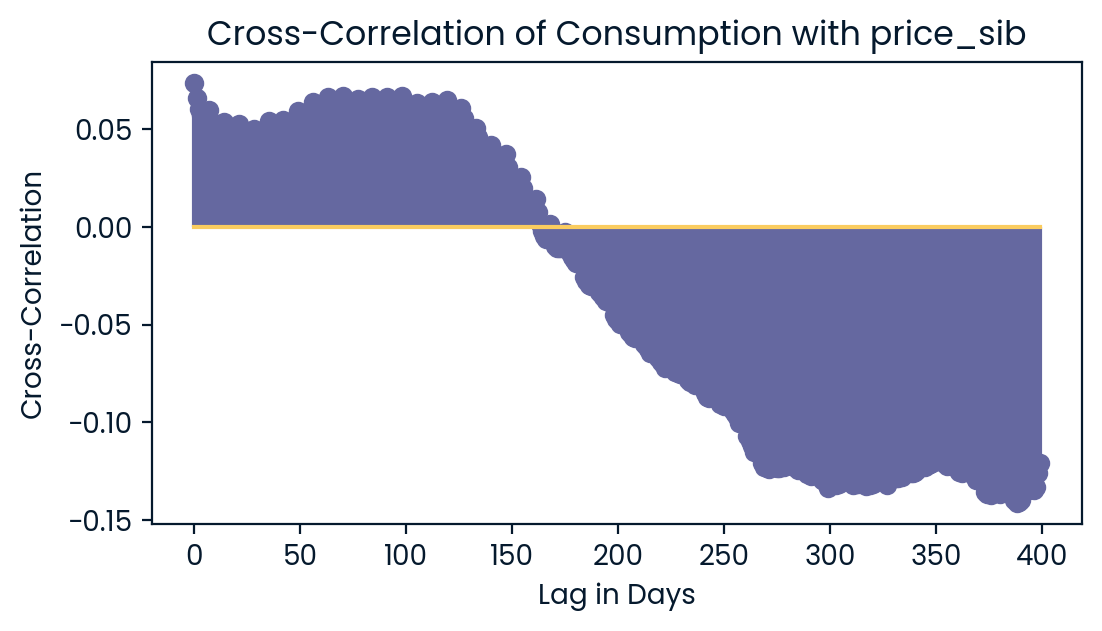

(array([  7,  14,  18,  21,  28,  35,  42,  49,  53,  56,  63,  70,  77,
        84,  91,  98, 105, 109, 112, 119, 126, 133, 140, 147, 154, 161,
       168, 175, 182, 189, 196, 203, 210, 217, 224, 231, 238, 245, 252,
       259, 266, 273, 277, 280, 287, 294, 301, 308, 315, 322, 329, 333,
       336, 343, 350, 357, 364, 371, 375, 378, 382, 385, 392, 395]), {})


In [73]:
# Check for cross-correlation to determine optimal lags with other features
features = ['T_MAX_RUS', 'T_MIN_RUS', 'T_AVG_RUS', 'RH_RUS', 'WND_RUS',
       'PRCP_RUS', 'ONI', 'price_sib']
for feature in features:
    cross_corr = ccf(dfMerged['consumption_sib'], dfMerged[feature], unbiased=True)[:400]
    plt.clf()
    plt.figure(figsize=(6, 3))
    plt.stem(range(len(cross_corr)), cross_corr)#, use_line_collection=True)
    plt.title(f'Cross-Correlation of Consumption with {feature}')
    plt.xlabel('Lag in Days')
    plt.ylabel('Cross-Correlation')
    plt.show()
    print(find_peaks(cross_corr))

In [74]:
dfMerged.columns

Index(['DATE', 'consumption_sib', 'price_sib', 'T_MAX_RUS', 'T_MIN_RUS',
       'T_AVG_RUS', 'RH_RUS', 'WND_RUS', 'PRCP_RUS', 'ONI'],
      dtype='object')

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import acf, ccf
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import r2_score

seedNum = 1001

dictCCF = { 'price_sib': 7, 'RH_RUS':5, 'WND_RUS':1, 'PRCP_RUS':2}

dfMerged_ml = dfMerged.copy()
dfMerged_ml = dfMerged_ml.drop(columns=['DATE'])

for lgs in list(range(7)):
	dfMerged_ml[f'consumption_sib_t-{lgs}'] = dfMerged_ml['consumption_sib'].shift(lgs)

for i in ['price_sib', 'RH_RUS', 'WND_RUS', 'PRCP_RUS']:
    dfMerged_ml[f'{i}_t-{dictCCF[i]}'] = dfMerged_ml[i].shift(dictCCF[i])

# Drop rows with NaN values resulting from the shift operation
dfMerged_ml.dropna(inplace=True)


# Define features and target
X = dfMerged_ml.filter(like='t-')
y = dfMerged_ml['consumption_sib']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seedNum)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the training data and transforming both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Initialize and train the MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train, y_train)

# Predict the test set
y_pred = mlp.predict(X_test)

In [94]:
import pandas as pd

# Combine y_test and y_pred into a DataFrame
dfpred = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred}, index=y_test.index)

# Sort the DataFrame by the index of y_test
dfpred.sort_index(inplace=True)

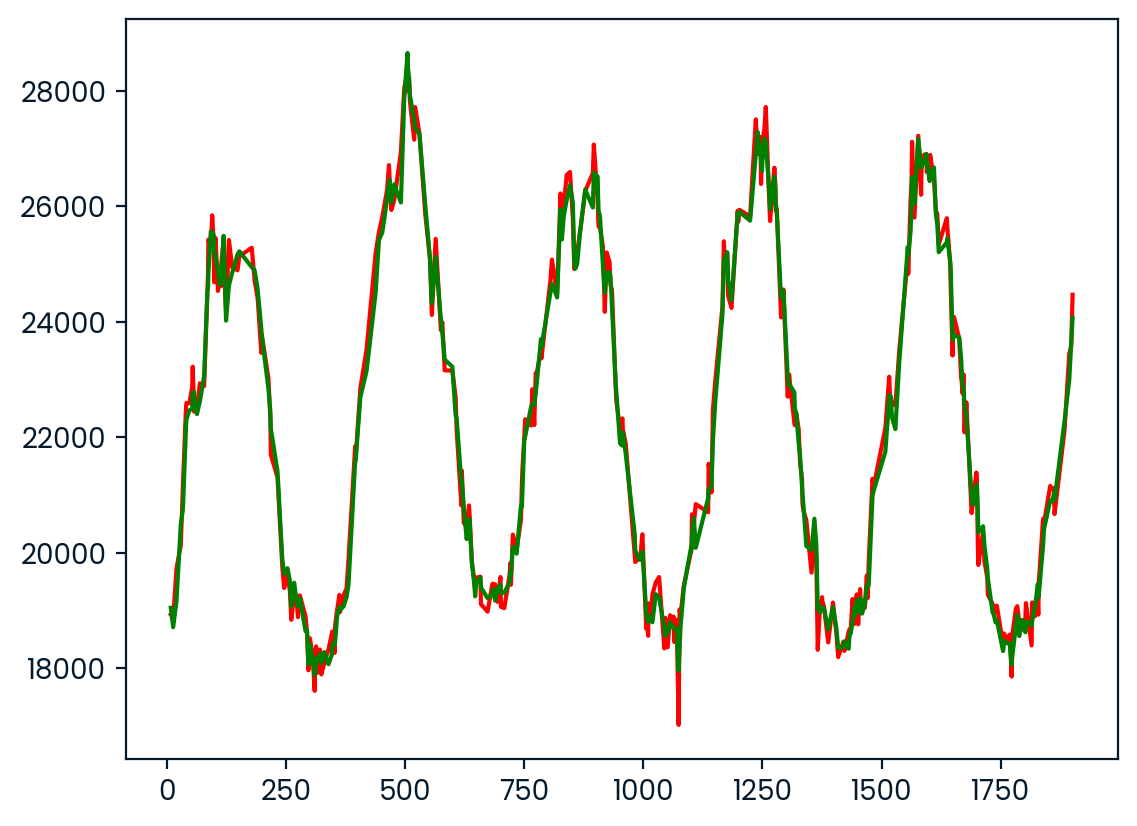

In [95]:
plt.plot(dfpred['y_test'], color='r')
plt.plot(dfpred['y_pred'], color='g')

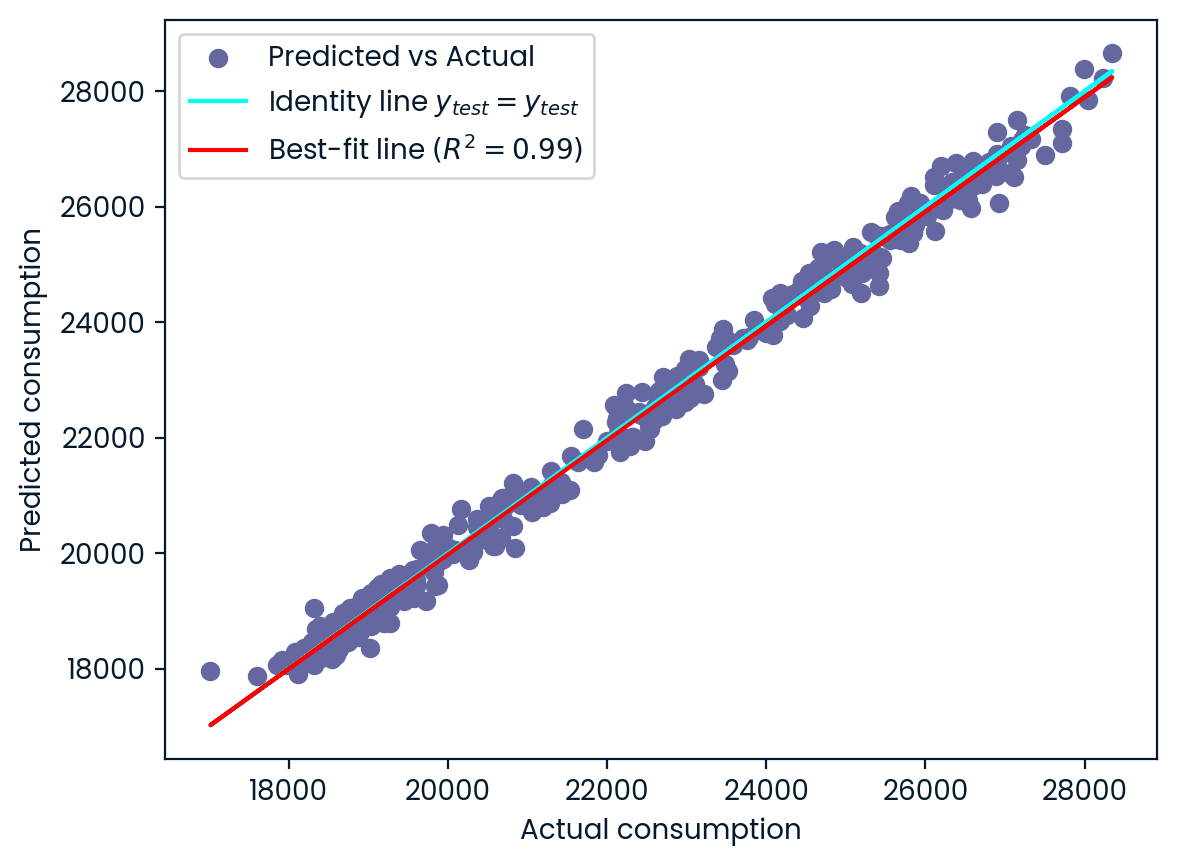

In [96]:
import numpy as np 


# Calculate R2 score
r2 = r2_score(y_test, y_pred)

# Best fit line
m, b = np.polyfit(y_test, y_pred, 1)


plt.scatter(y_test, y_pred, label='Predicted vs Actual')
plt.plot(y_test, y_test, color='cyan', label='Identity line $y_{test}=y_{test}$')
plt.plot(y_test, m*y_test + b, color='red', label=f'Best-fit line $(R^{2}={r2:.2f})$', )
plt.ylabel('Predicted consumption')
plt.xlabel('Actual consumption')
plt.legend(loc='best')